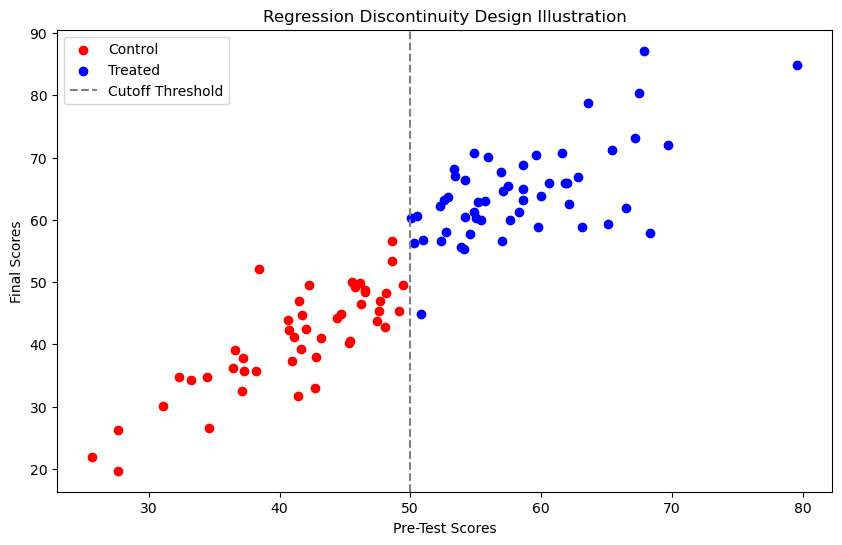

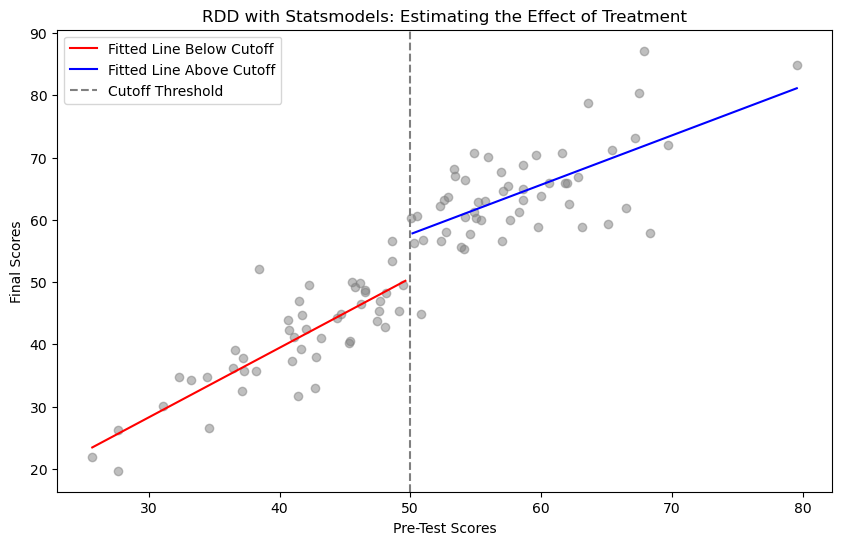

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

np.random.seed(1663)
n = 100
cutoff = 50

pre_test_scores = np.random.normal(50, 10, n)
treatment = np.where(pre_test_scores >= cutoff, 1, 0)
treatment_effect = 5
final_scores = pre_test_scores + treatment * treatment_effect + np.random.normal(0, 5, n)

data = pd.DataFrame({'PreTest': pre_test_scores, 'Treatment': treatment, 'FinalScore': final_scores})

plt.figure(figsize=(10, 6))
plt.scatter(data[data['Treatment'] == 0]['PreTest'], data[data['Treatment'] == 0]['FinalScore'], color='red', label='Control')
plt.scatter(data[data['Treatment'] == 1]['PreTest'], data[data['Treatment'] == 1]['FinalScore'], color='blue', label='Treated')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Final Scores')
plt.axvline(x=cutoff, color='grey', linestyle='--', label='Cutoff Threshold')
plt.legend()
plt.title('Regression Discontinuity Design Illustration')
plt.show()

data['Intercept'] = 1

below_cutoff = data[data['PreTest'] < cutoff]
above_cutoff = data[data['PreTest'] >= cutoff]

model_below = sm.OLS(below_cutoff['FinalScore'], below_cutoff[['Intercept', 'PreTest']]).fit()
model_above = sm.OLS(above_cutoff['FinalScore'], above_cutoff[['Intercept', 'PreTest']]).fit()

X_plot = np.linspace(data['PreTest'].min(), data['PreTest'].max(), 100)
X_plot_with_intercept = sm.add_constant(X_plot, has_constant='add')

predictions_below = model_below.predict(sm.add_constant(X_plot[X_plot < cutoff], has_constant='add'))
predictions_above = model_above.predict(sm.add_constant(X_plot[X_plot >= cutoff], has_constant='add'))

plt.figure(figsize=(10, 6))
plt.scatter(data['PreTest'], data['FinalScore'], color='grey', alpha=0.5)
plt.plot(X_plot[X_plot < cutoff], predictions_below, color='red', label='Fitted Line Below Cutoff')
plt.plot(X_plot[X_plot >= cutoff], predictions_above, color='blue', label='Fitted Line Above Cutoff')
plt.xlabel('Pre-Test Scores')
plt.ylabel('Final Scores')
plt.axvline(x=cutoff, color='grey', linestyle='--', label='Cutoff Threshold')
plt.legend()
plt.title('RDD with Statsmodels: Estimating the Effect of Treatment')
plt.show()